## The Problem Definition

In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import chardet
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# uploading data
path = "seoul_bike_sharing_demand\SeoulBikeData.csv"

In [3]:
df_seoulbike = pd.read_csv(path)

In [4]:
df_seoulbike

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## __Finding out the enconding type__

In [5]:
#Let's clean the varible's names to work with it.
df_seoulbike.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(�C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [6]:
#Ok we have a little suprise here. The symbol �, I don't know o que that means. 
#So I had to findout what is this to work with pandas.
#So I will use the chardet library to help me with this.
with open(path, 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding


{'encoding': 'ISO-8859-9',
 'confidence': 0.7396635956274547,
 'language': 'Turkish'}

In [7]:
# Good, now I will open the as a dataframe with the right encoding.
with open (path,'r',encoding=r_encoding['encoding']) as df_seoulbike:
    df_seoulbike= pd.read_csv(df_seoulbike)

In [8]:
df_seoulbike.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

## __Cleaning the column's name__

In [9]:
#Building a function to clean the columns name. Taking out the space and putting all in lower case:
replacing1= {" ":"_"}


cols = [col.strip().lower().replace(" ","_")
       for col in df_seoulbike.columns]

df_seoulbike.columns = cols
df_seoulbike.columns.to_list()

['date',
 'rented_bike_count',
 'hour',
 'temperature(°c)',
 'humidity(%)',
 'wind_speed_(m/s)',
 'visibility_(10m)',
 'dew_point_temperature(°c)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)',
 'seasons',
 'holiday',
 'functioning_day']

###  __Cheking the shape and looking for NAN values__

In [10]:
#Let's check the shape of the dataset
initial_shape = df_seoulbike.shape
initial_shape

(8760, 14)

In [11]:
#Good, Now let's see if we have some missing values.
# So I can do it with a isnan function
df_seoulbike.isna().sum()

date                         0
rented_bike_count            0
hour                         0
temperature(°c)              0
humidity(%)                  0
wind_speed_(m/s)             0
visibility_(10m)             0
dew_point_temperature(°c)    0
solar_radiation_(mj/m2)      0
rainfall(mm)                 0
snowfall_(cm)                0
seasons                      0
holiday                      0
functioning_day              0
dtype: int64

<AxesSubplot:>

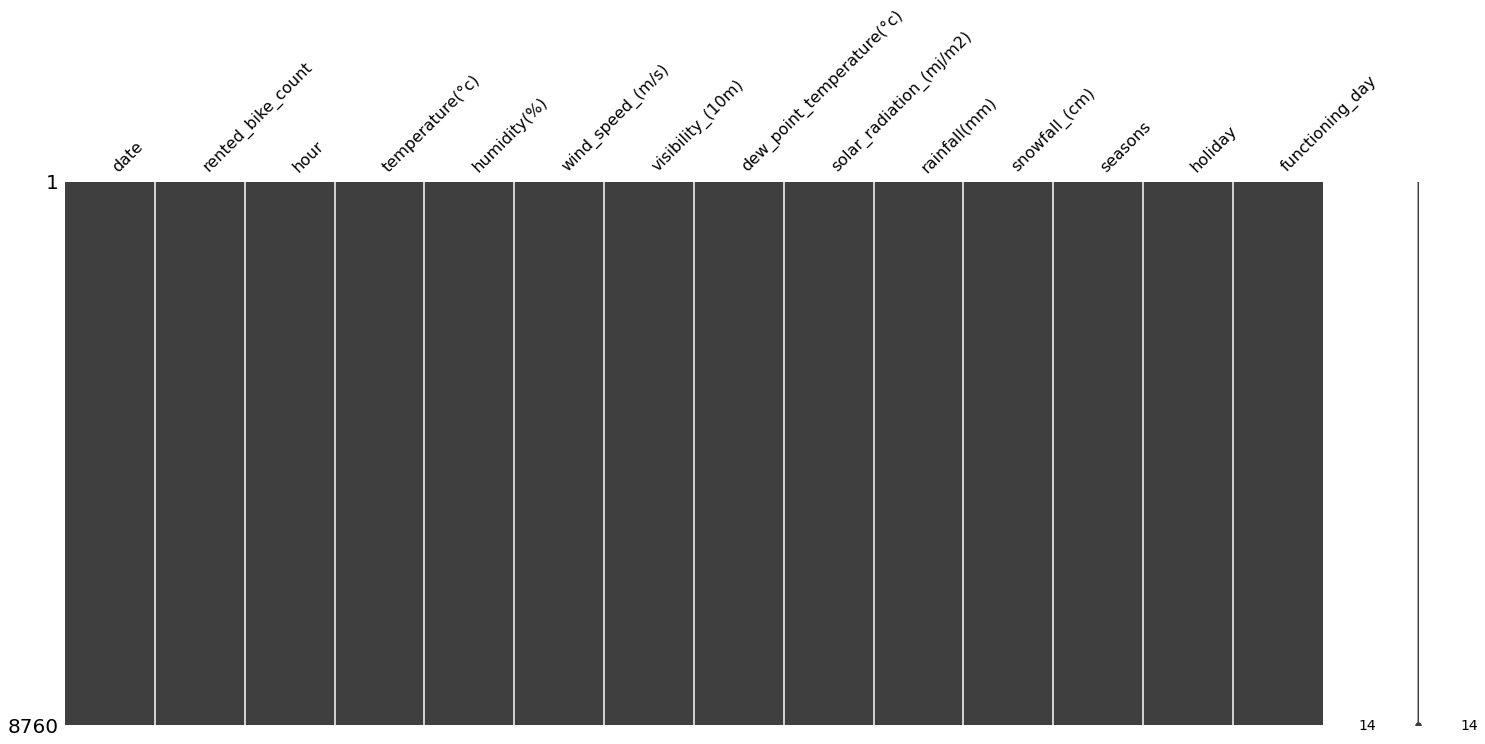

In [12]:
#I could also check it with a missingno library
msno.matrix(df_seoulbike)

### __Checking the data type and casting it if necessary__

In [13]:
#Ok really no missing values
#Let's ckeck the type of columns do we have
df_seoulbike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented_bike_count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind_speed_(m/s)           8760 non-null   float64
 6   visibility_(10m)           8760 non-null   int64  
 7   dew_point_temperature(°c)  8760 non-null   float64
 8   solar_radiation_(mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall_(cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning_day            8760 non-null   objec

In [14]:
df_seoulbike.dtypes

date                          object
rented_bike_count              int64
hour                           int64
temperature(°c)              float64
humidity(%)                    int64
wind_speed_(m/s)             float64
visibility_(10m)               int64
dew_point_temperature(°c)    float64
solar_radiation_(mj/m2)      float64
rainfall(mm)                 float64
snowfall_(cm)                float64
seasons                       object
holiday                       object
functioning_day               object
dtype: object

In [15]:
int_type = df_seoulbike.select_dtypes(include = "integer").columns.to_list()
float_type = df_seoulbike.select_dtypes(include = "float").columns.to_list()
object_type = df_seoulbike.select_dtypes(include = "object").columns.to_list()

print("The int columns type: ")
int_type



The int columns type: 


['rented_bike_count', 'hour', 'humidity(%)', 'visibility_(10m)']

In [16]:
df_seoulbike.select_dtypes(include = "integer")

,rented_bike_count,hour,humidity(%),visibility_(10m)
0,254,0,37,2000
1,204,1,38,2000
2,173,2,39,2000
3,107,3,40,2000
4,78,4,36,2000
...,...,...,...,...
8755,1003,19,34,1894
8756,764,20,37,2000
8757,694,21,39,1968
8758,712,22,41,1859


In [17]:
print("The float columns type: ")
float_type

The float columns type: 


['temperature(°c)',
 'wind_speed_(m/s)',
 'dew_point_temperature(°c)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)']

In [18]:
df_seoulbike.select_dtypes(include = "float")

,temperature(°c),wind_speed_(m/s),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
0,-5.2,2.2,-17.6,0.0,0.0,0.0
1,-5.5,0.8,-17.6,0.0,0.0,0.0
2,-6.0,1.0,-17.7,0.0,0.0,0.0
3,-6.2,0.9,-17.6,0.0,0.0,0.0
4,-6.0,2.3,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...
8755,4.2,2.6,-10.3,0.0,0.0,0.0
8756,3.4,2.3,-9.9,0.0,0.0,0.0
8757,2.6,0.3,-9.9,0.0,0.0,0.0
8758,2.1,1.0,-9.8,0.0,0.0,0.0


In [19]:
print("The object columns type: ")
object_type

The object columns type: 


['date', 'seasons', 'holiday', 'functioning_day']

In [20]:
df_seoulbike.select_dtypes(include = "object")

,date,seasons,holiday,functioning_day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes
...,...,...,...,...
8755,30/11/2018,Autumn,No Holiday,Yes
8756,30/11/2018,Autumn,No Holiday,Yes
8757,30/11/2018,Autumn,No Holiday,Yes
8758,30/11/2018,Autumn,No Holiday,Yes


In [21]:
#Hun I'm not sure we need use float64 in all float types. Maybe we can improve it.
#Let's ckeck the usage of all memory.
first_memory_usage = df_seoulbike.memory_usage(deep=True)
first_memory_usage

Index                           128
date                         586920
rented_bike_count             70080
hour                          70080
temperature(°c)               70080
humidity(%)                   70080
wind_speed_(m/s)              70080
visibility_(10m)              70080
dew_point_temperature(°c)     70080
solar_radiation_(mj/m2)       70080
rainfall(mm)                  70080
snowfall_(cm)                 70080
seasons                      551880
holiday                      585624
functioning_day              525305
dtype: int64

### Ok now we know the type of columns we are working with. Let's casting some of then and create other ones.


In [22]:


class Treating_data:
    '''
    A class to cast the datetypes and to create new columns date type.. 
    Changing the data type, creating new date columns information and changing the new columns date type.
    '''
    
    def __init__(self, df_bike):
        '''
        Creating the sequence of treating to data.
        '''
        self.df_bike = df_bike
        self.changing_type(self.df_bike)
        self.creating_date_info(self.df_bike)
        self.changing_type_after_date_info(self.df_bike)
        self.changing_to_binary_column(self.df_bike)


    def changing_type(self,df_seoulbike):
        '''
        A functon to change the size of float type, 
        to create a column to datetime type and change object type to category type.
        '''
        for coluna in df_seoulbike.columns:
            if "temperature" in coluna:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("float16")
            elif "date" in coluna:
                df_seoulbike[coluna] = pd.to_datetime(arg=df_seoulbike[coluna],format= "%d/%m/%Y")
            elif coluna in ['seasons','holiday','functioning_day']:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("category")
        return  df_seoulbike


    def creating_date_info(self,df_seoulbike):
        '''
        A function to create date type columns.
        '''
        df_seoulbike['day_of_week'] =df_seoulbike['date'].dt.day_name() 
        df_seoulbike['year'] = df_seoulbike['date'].dt.year
        df_seoulbike['month'] = df_seoulbike['date'].dt.month #I need this feature to stratify during the train and test moment
        #df_seoulbike['day_of_year'] = df_seoulbike['date'].dt.dayofyear
        df_seoulbike['week_of_year'] = df_seoulbike['date'].dt.isocalendar().week
        #df_seoulbike['month_name'] = df_seoulbike['date'].dt.month_name()
        #df_seoulbike['period_day'] = df_seoulbike['date'].dt.strftime('%a')
        df_seoulbike['month_name'] = df_seoulbike['date'].dt.strftime('%b')
        return  df_seoulbike

    def changing_type_after_date_info(self,df_seoulbike):
        '''
        
        '''
        for coluna in df_seoulbike.columns:
            if coluna in ['day_of_week','year','month','week_of_year', 'month_name','hour']:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("category")
        return  df_seoulbike
    
    def changing_to_binary_column(self,df_seoulbike):
        '''
        
        '''
        df_seoulbike["holiday"] = df_seoulbike["holiday"].map({"No Holiday":0,"Holiday":1})
        df_seoulbike["functioning_day"] = df_seoulbike["functioning_day"].map({"No" : 0, "Yes":1})


In [23]:
df_seoulbike = Treating_data(df_seoulbike)

In [24]:
df_seoulbike.df_bike

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
0,2017-12-01,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
1,2017-12-01,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
3,2017-12-01,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
4,2017-12-01,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.199219,34,2.6,1894,-10.296875,0.0,0.0,0.0,Autumn,0,1,Friday,2018,11,48,Nov
8756,2018-11-30,764,20,3.400391,37,2.3,2000,-9.898438,0.0,0.0,0.0,Autumn,0,1,Friday,2018,11,48,Nov
8757,2018-11-30,694,21,2.599609,39,0.3,1968,-9.898438,0.0,0.0,0.0,Autumn,0,1,Friday,2018,11,48,Nov
8758,2018-11-30,712,22,2.099609,41,1.0,1859,-9.796875,0.0,0.0,0.0,Autumn,0,1,Friday,2018,11,48,Nov


In [25]:
df_seoulbike_treated = df_seoulbike.df_bike

In [26]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   category      
 3   temperature(°c)            8760 non-null   float16       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float64       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float16       
 8   solar_radiation_(mj/m2)    8760 non-null   float64       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float64       
 11  seasons                    8760 non-null   category      
 12  holida

In [27]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724909,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036300,608.298712,13.054688,0.868746,1.128193,0.436746
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


In [28]:
df_seoulbike_treated.shape

(8760, 19)

In [29]:
df_categorical_columns = df_seoulbike_treated.select_dtypes(include = "category")
df_categorical_columns 

,hour,seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
0,0,Winter,0,1,Friday,2017,12,48,Dec
1,1,Winter,0,1,Friday,2017,12,48,Dec
2,2,Winter,0,1,Friday,2017,12,48,Dec
3,3,Winter,0,1,Friday,2017,12,48,Dec
4,4,Winter,0,1,Friday,2017,12,48,Dec
...,...,...,...,...,...,...,...,...,...
8755,19,Autumn,0,1,Friday,2018,11,48,Nov
8756,20,Autumn,0,1,Friday,2018,11,48,Nov
8757,21,Autumn,0,1,Friday,2018,11,48,Nov
8758,22,Autumn,0,1,Friday,2018,11,48,Nov


In [30]:
categorical_columns = df_categorical_columns.columns

In [31]:
categorical_columns

Index(['hour', 'seasons', 'holiday', 'functioning_day', 'day_of_week', 'year',
       'month', 'week_of_year', 'month_name'],
      dtype='object')

In [32]:
df_seoulbike_treated

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
0,2017-12-01,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
1,2017-12-01,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
3,2017-12-01,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
4,2017-12-01,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.199219,34,2.6,1894,-10.296875,0.0,0.0,0.0,Autumn,0,1,Friday,2018,11,48,Nov
8756,2018-11-30,764,20,3.400391,37,2.3,2000,-9.898438,0.0,0.0,0.0,Autumn,0,1,Friday,2018,11,48,Nov
8757,2018-11-30,694,21,2.599609,39,0.3,1968,-9.898438,0.0,0.0,0.0,Autumn,0,1,Friday,2018,11,48,Nov
8758,2018-11-30,712,22,2.099609,41,1.0,1859,-9.796875,0.0,0.0,0.0,Autumn,0,1,Friday,2018,11,48,Nov


In [33]:
df_seoulbike_treated['year'].unique()

[2017, 2018]
Categories (2, int64): [2017, 2018]

In [34]:
df_seoulbike_treated = df_seoulbike_treated.drop(["date"],axis=1, inplace=False)

In [35]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float64 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float64 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float64 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

In [36]:
df_seoulbike_treated.head(7)

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
0,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
1,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
2,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
3,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
4,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
5,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec
6,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,Friday,2017,12,48,Dec


In [37]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724909,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036300,608.298712,13.054688,0.868746,1.128193,0.436746
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


In [38]:
df_seoulbike_treated['year']=='2017'

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: year, Length: 8760, dtype: bool

In [39]:
df_seoulbike_treated['month_name'].unique()

['Dec', 'Jan', 'Feb', 'Mar', 'Apr', ..., 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
Length: 12
Categories (12, object): ['Dec', 'Jan', 'Feb', 'Mar', ..., 'Aug', 'Sep', 'Oct', 'Nov']

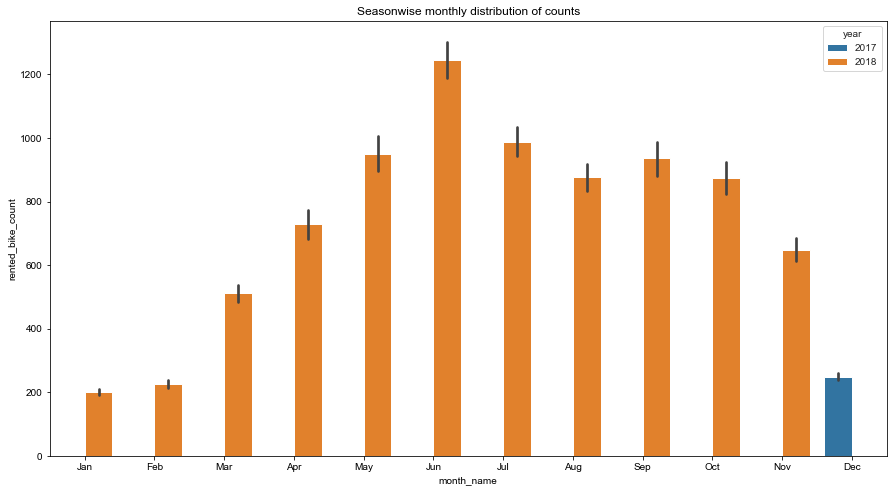

In [40]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated[['month_name','rented_bike_count','year']],hue='year',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

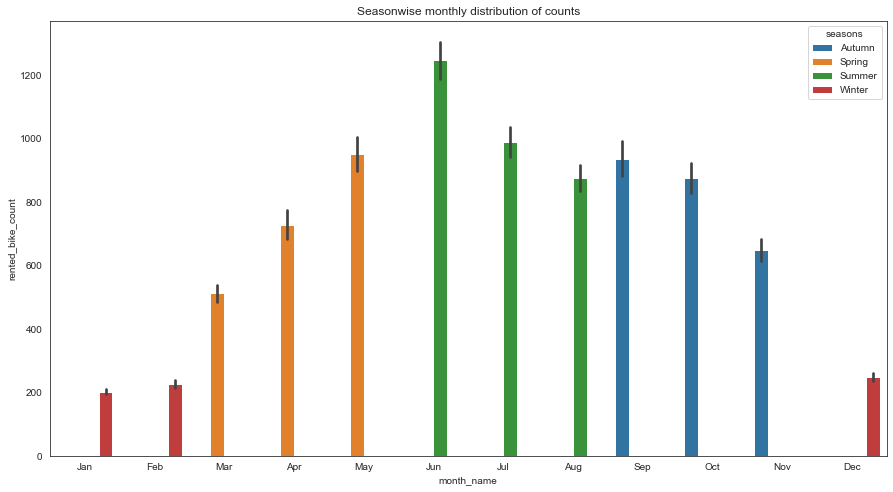

In [41]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

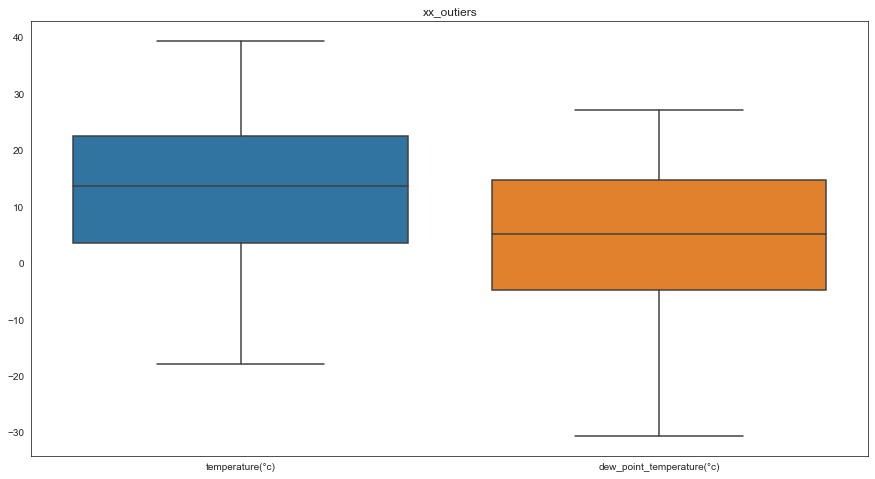

In [42]:
celsius = []
for mensure in float_type:
    if '(°c)' in mensure:
        celsius.append(mensure)
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated[celsius])
ax.set_title('xx_outiers')
plt.show()

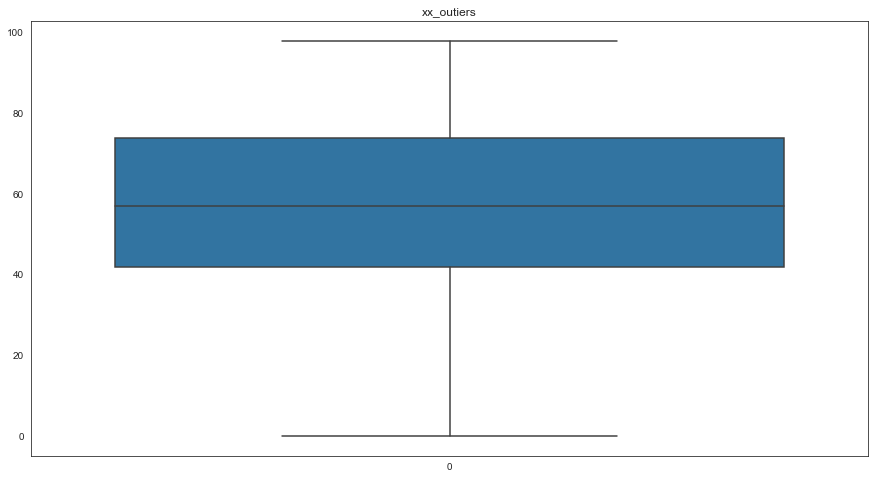

In [43]:

fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['humidity(%)'])
ax.set_title('xx_outiers')
plt.show()

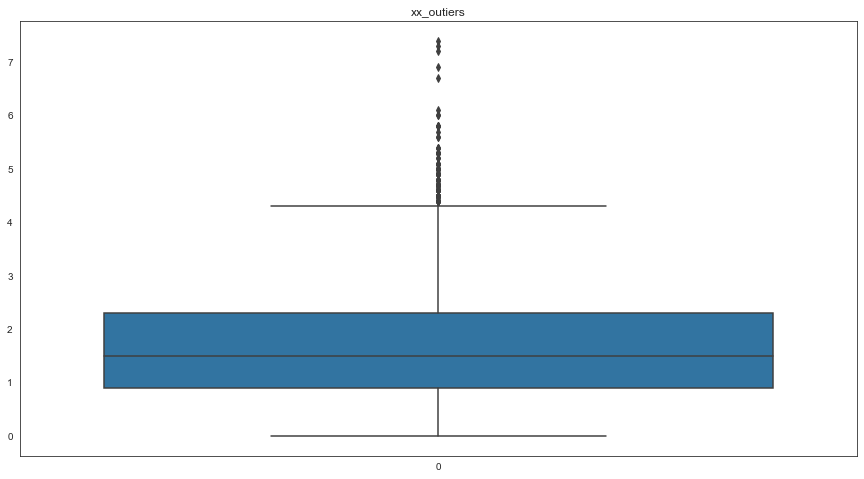

In [44]:


fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['wind_speed_(m/s)'])
ax.set_title('xx_outiers')
plt.show()

In [45]:
df_seoulbike_treated['wind_speed_(m/s)'].describe()

count    8760.000000
mean        1.724909
std         1.036300
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: wind_speed_(m/s), dtype: float64

In [46]:
wind_speed_Q1 = df_seoulbike_treated['wind_speed_(m/s)'].quantile(0.25)
wind_speed_Q3 = df_seoulbike_treated['wind_speed_(m/s)'].quantile(0.75)

print(f"The first Quantile of Wind_Speed is {wind_speed_Q1}")
print(f"The Thrid Quantile of Wind_Speed is {wind_speed_Q3}")

The first Quantile of Wind_Speed is 0.9
The Thrid Quantile of Wind_Speed is 2.3


In [47]:
wind_speed_IQR = wind_speed_Q3-wind_speed_Q1
wind_speed_IQR

1.4

### Calculating the Mild Outliers

In [48]:
#Calculating the Mild Outliers

mild_lower_bound = wind_speed_Q1-(1.5 * wind_speed_IQR)
mild_upper_bound = wind_speed_Q3+(1.5 * wind_speed_IQR)
print(f"The Mild Lower Bound is {mild_lower_bound}")
print(f"The Mild Upper Bound is {mild_upper_bound}")

The Mild Lower Bound is -1.1999999999999997
The Mild Upper Bound is 4.3999999999999995


### Calculating the Extreme Outlier


In [49]:
extreme_lower_bound = wind_speed_Q1-(3 * wind_speed_IQR)
extreme_upper_bound = wind_speed_Q3+(3 * wind_speed_IQR)
print(f"The Extreme Lower Bound is {extreme_lower_bound}")
print(f"The Extreme Upper Bound is {extreme_upper_bound}")

The Extreme Lower Bound is -3.2999999999999994
The Extreme Upper Bound is 6.499999999999999


In [50]:
outliers_lied_upper = df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound

In [51]:
outliers_lied_upper

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: wind_speed_(m/s), Length: 8760, dtype: bool

In [52]:
#Now let's determine the number of outlier thar are lie outside of the mild_upper_bound

number_of_outliers_lied_upper=(df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound).sum()
number_of_outliers_lied_upper

161

In [53]:
#Calculating the percentage of wind_speed lied over the Mild Upper Bound
(df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound).mean()*100

1.8378995433789953

In [54]:
#So now we'll identify which ones they are.
df_seoulbike_treated_wind_speed_lied_upper_outliers= df_seoulbike_treated[df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound]
df_seoulbike_treated_wind_speed_lied_upper_outliers

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
82,311,10,-1.099609,40,4.5,2000,-13.000000,0.64,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
84,393,12,-0.300049,38,4.8,1823,-12.898438,1.11,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
85,391,13,0.000000,30,5.4,1938,-15.500000,1.17,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
86,338,14,0.099976,27,4.5,2000,-16.703125,1.09,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
87,341,15,-0.099976,25,5.8,2000,-17.796875,0.88,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,1183,14,10.796875,37,4.4,2000,-3.300781,1.29,0.0,0.0,Autumn,0,1,Saturday,2018,10,43,Oct
7937,1176,17,9.500000,34,5.7,2000,-5.601562,0.45,0.0,0.0,Autumn,0,1,Saturday,2018,10,43,Oct
7985,1274,17,10.000000,43,4.9,2000,-2.000000,0.43,0.0,0.0,Autumn,0,1,Monday,2018,10,44,Oct
8242,0,10,11.296875,68,4.7,1984,5.500000,0.44,0.0,0.0,Autumn,0,0,Friday,2018,11,45,Nov


In [55]:
df_seoulbike_treated_wind_speed_lied_upper_outliers.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,528.850932,7.507812,42.894410,4.885093,1661.136646,-5.292969,1.210621,0.154037,0.083230
std,470.221852,11.734375,19.641347,0.542127,509.133093,13.703125,1.025757,1.058654,0.250309
min,0.000000,-14.500000,14.000000,4.400000,214.000000,-30.593750,0.000000,0.000000,0.000000
25%,177.000000,-2.400391,30.000000,4.500000,1480.000000,-17.703125,0.170000,0.000000,0.000000
50%,302.000000,5.000000,37.000000,4.700000,1938.000000,-5.699219,1.090000,0.000000,0.000000
75%,931.000000,18.593750,52.000000,5.000000,2000.000000,4.898438,1.960000,0.000000,0.000000
max,2068.000000,33.312500,96.000000,7.400000,2000.000000,23.203125,3.320000,13.000000,1.000000


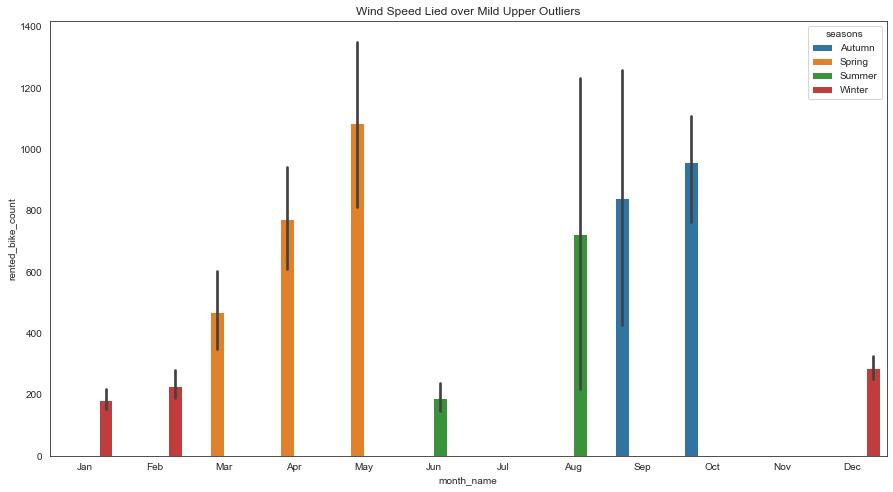

In [56]:
#let's see in which season that happened

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=df_seoulbike_treated_wind_speed_lied_upper_outliers[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)
ax.set_title('Wind Speed Lied over Mild Upper Outliers')
plt.show()

Ok that happened during all the year
OK I will replace the upper outliers with the mean valuers during each season

In [57]:
#first I will replace the outliers with nan values 
df_seoulbike_treated_wind_speed_lied_upper_outliers_nan = df_seoulbike_treated_wind_speed_lied_upper_outliers.copy()
df_seoulbike_treated_wind_speed_lied_upper_outliers_nan.loc[:,'wind_speed_(m/s)'] = np.nan

In [58]:
#No we have all the upper outliers placed with NAN values
df_seoulbike_treated_wind_speed_lied_upper_outliers_nan

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
82,311,10,-1.099609,40,NaN,2000,-13.000000,0.64,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
84,393,12,-0.300049,38,NaN,1823,-12.898438,1.11,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
85,391,13,0.000000,30,NaN,1938,-15.500000,1.17,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
86,338,14,0.099976,27,NaN,2000,-16.703125,1.09,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
87,341,15,-0.099976,25,NaN,2000,-17.796875,0.88,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,1183,14,10.796875,37,NaN,2000,-3.300781,1.29,0.0,0.0,Autumn,0,1,Saturday,2018,10,43,Oct
7937,1176,17,9.500000,34,NaN,2000,-5.601562,0.45,0.0,0.0,Autumn,0,1,Saturday,2018,10,43,Oct
7985,1274,17,10.000000,43,NaN,2000,-2.000000,0.43,0.0,0.0,Autumn,0,1,Monday,2018,10,44,Oct
8242,0,10,11.296875,68,NaN,1984,5.500000,0.44,0.0,0.0,Autumn,0,0,Friday,2018,11,45,Nov


In [59]:
df_seoulbike_treated_wind_speed_lied_upper_outliers_nan.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,161.000000,161.000000,161.000000,0.0,161.000000,161.000000,161.000000,161.000000,161.000000
mean,528.850932,7.507812,42.894410,NaN,1661.136646,-5.292969,1.210621,0.154037,0.083230
std,470.221852,11.734375,19.641347,NaN,509.133093,13.703125,1.025757,1.058654,0.250309
min,0.000000,-14.500000,14.000000,NaN,214.000000,-30.593750,0.000000,0.000000,0.000000
25%,177.000000,-2.400391,30.000000,NaN,1480.000000,-17.703125,0.170000,0.000000,0.000000
50%,302.000000,5.000000,37.000000,NaN,1938.000000,-5.699219,1.090000,0.000000,0.000000
75%,931.000000,18.593750,52.000000,NaN,2000.000000,4.898438,1.960000,0.000000,0.000000
max,2068.000000,33.312500,96.000000,NaN,2000.000000,23.203125,3.320000,13.000000,1.000000


In [60]:
df_seoulbike_treated_wind_speed_lied_upper_outliers_nan.index

Int64Index([  82,   84,   85,   86,   87,   88,   89,   93,  231,  238,
            ...
            7550, 7835, 7916, 7932, 7933, 7934, 7937, 7985, 8242, 8245],
           dtype='int64', length=161)

In [61]:
df_seoulbike_treated_wind_speed_lied_upper_outliers_nan.iloc[82,2]

6.7

In [62]:
df_seoulbike_treated_wind_speed_lied_upper_outliers

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
82,311,10,-1.099609,40,4.5,2000,-13.000000,0.64,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
84,393,12,-0.300049,38,4.8,1823,-12.898438,1.11,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
85,391,13,0.000000,30,5.4,1938,-15.500000,1.17,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
86,338,14,0.099976,27,4.5,2000,-16.703125,1.09,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
87,341,15,-0.099976,25,5.8,2000,-17.796875,0.88,0.0,0.0,Winter,0,1,Monday,2017,12,49,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,1183,14,10.796875,37,4.4,2000,-3.300781,1.29,0.0,0.0,Autumn,0,1,Saturday,2018,10,43,Oct
7937,1176,17,9.500000,34,5.7,2000,-5.601562,0.45,0.0,0.0,Autumn,0,1,Saturday,2018,10,43,Oct
7985,1274,17,10.000000,43,4.9,2000,-2.000000,0.43,0.0,0.0,Autumn,0,1,Monday,2018,10,44,Oct
8242,0,10,11.296875,68,4.7,1984,5.500000,0.44,0.0,0.0,Autumn,0,0,Friday,2018,11,45,Nov


In [63]:
df_seoulbike_treated_wind_speed_lied_upper_outliers.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,528.850932,7.507812,42.894410,4.885093,1661.136646,-5.292969,1.210621,0.154037,0.083230
std,470.221852,11.734375,19.641347,0.542127,509.133093,13.703125,1.025757,1.058654,0.250309
min,0.000000,-14.500000,14.000000,4.400000,214.000000,-30.593750,0.000000,0.000000,0.000000
25%,177.000000,-2.400391,30.000000,4.500000,1480.000000,-17.703125,0.170000,0.000000,0.000000
50%,302.000000,5.000000,37.000000,4.700000,1938.000000,-5.699219,1.090000,0.000000,0.000000
75%,931.000000,18.593750,52.000000,5.000000,2000.000000,4.898438,1.960000,0.000000,0.000000
max,2068.000000,33.312500,96.000000,7.400000,2000.000000,23.203125,3.320000,13.000000,1.000000


In [64]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float64 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float64 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float64 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

In [65]:
#Now I will replace the original dataset with the NAN values
df_seoulbike_treated['wind_speed_(m/s)']=df_seoulbike_treated['wind_speed_(m/s)'].replace(df_seoulbike_treated_wind_speed_lied_upper_outliers_nan['wind_speed_(m/s)'])

In [66]:
#Veja agora vai constar os NANs
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float64 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float64 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float64 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

<AxesSubplot:>

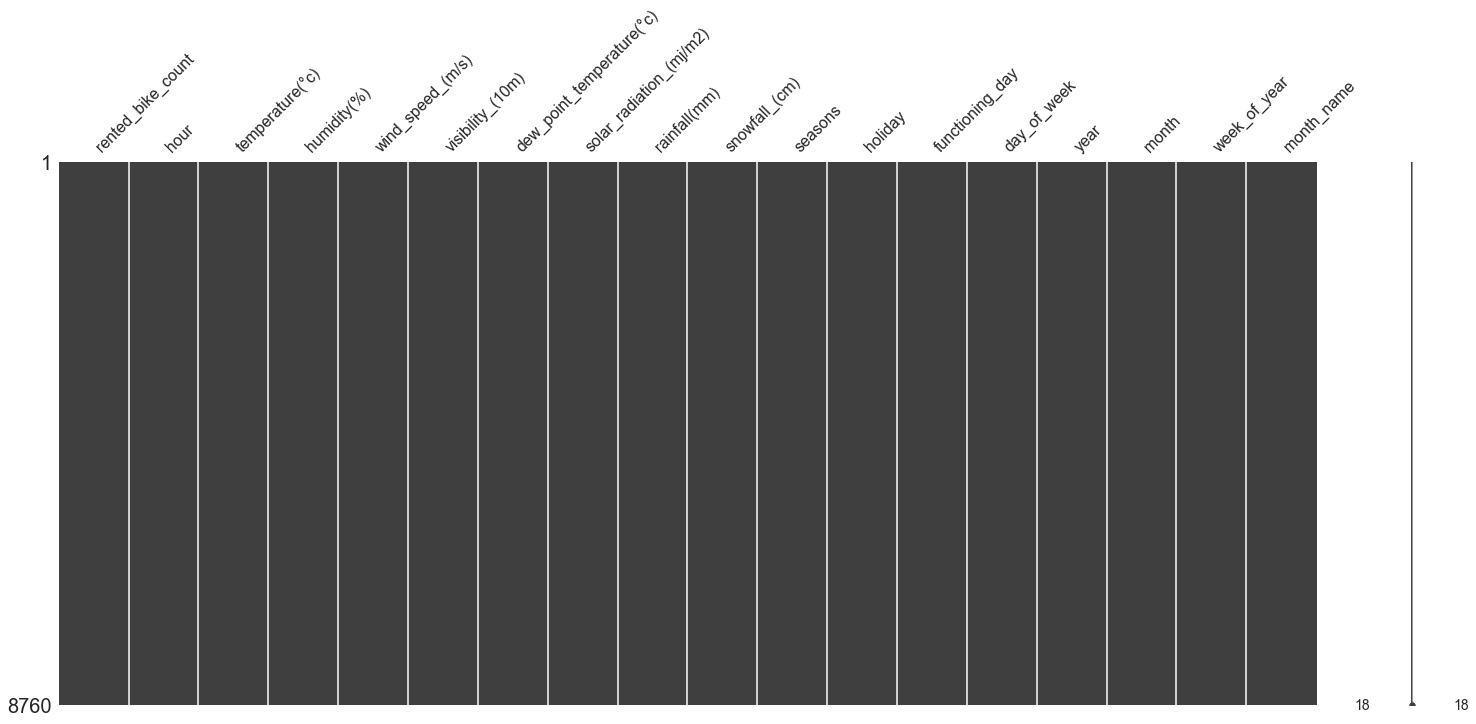

In [67]:
msno.matrix(df_seoulbike_treated)

In [68]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float64 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float64 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float64 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

In [69]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724909,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036300,608.298712,13.054688,0.868746,1.128193,0.436746
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


In [70]:
# Estranho tenho rented_bike_count igual a Zero... mas como pode ser isto? Eu aluguei realmente zero ou é um erro?

total_zero_bikes = pd.DataFrame(df_seoulbike_treated['rented_bike_count']==0).value_counts()
total_zero_bikes

rented_bike_count
False                8465
True                  295
dtype: int64

In [71]:
#Vamos investigar isto melhor
#Vamos analisar o dataframe só com estes valores

criteria_1 = df_seoulbike_treated['rented_bike_count']==0
df_seoulbike_treated[criteria_1]


,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
3144,0,0,14.398438,82,4.6,1041,11.296875,0.0,0.0,0.0,Spring,0,0,Wednesday,2018,4,15,Apr
3145,0,1,13.601562,81,3.6,886,10.296875,0.0,0.0,0.0,Spring,0,0,Wednesday,2018,4,15,Apr
3146,0,2,12.703125,80,3.9,885,9.296875,0.0,0.0,0.0,Spring,0,0,Wednesday,2018,4,15,Apr
3147,0,3,11.601562,81,3.1,687,8.398438,0.0,0.0,0.0,Spring,0,0,Wednesday,2018,4,15,Apr
3148,0,4,10.203125,83,3.5,554,7.398438,0.0,0.0,0.0,Spring,0,0,Wednesday,2018,4,15,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,0,19,11.898438,71,2.7,589,6.699219,0.0,0.0,0.0,Autumn,0,0,Friday,2018,11,45,Nov
8252,0,20,11.898438,72,2.5,526,7.000000,0.0,0.0,0.0,Autumn,0,0,Friday,2018,11,45,Nov
8253,0,21,11.398438,74,1.9,498,6.898438,0.0,0.0,0.0,Autumn,0,0,Friday,2018,11,45,Nov
8254,0,22,11.203125,75,1.7,478,6.898438,0.0,0.0,0.0,Autumn,0,0,Friday,2018,11,45,Nov


In [72]:
value_por_hour = df_seoulbike_treated[criteria_1]
por_hora = value_por_hour['hour'].value_counts()
por_hora

0     13
2     13
3     13
4     13
5     13
6     13
1     13
15    12
22    12
21    12
20    12
19    12
18    12
17    12
16    12
12    12
14    12
13    12
11    12
10    12
9     12
8     12
7     12
23    12
Name: hour, dtype: int64

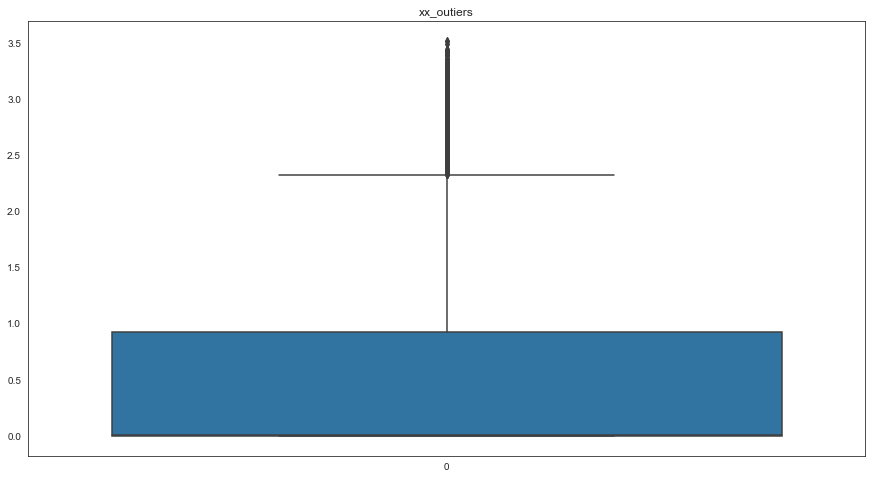

In [73]:


fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['solar_radiation_(mj/m2)'])
ax.set_title('xx_outiers')
plt.show()

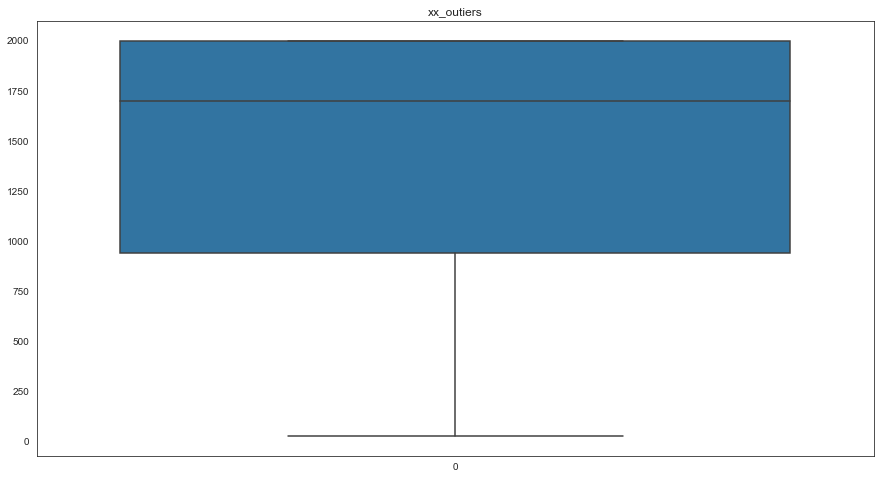

In [74]:



fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['visibility_(10m)'])
ax.set_title('xx_outiers')
plt.show()

In [75]:
renaming_columns ={"temperature(°c)":"temperatura_in_celcius", 
 "humidity(%)": "humidity_in_percent",
 "wind_speed_(m/s)":"wind_speed_meters_por_second",
 "visibility_(10m)":"visibility_10m",
 "dew_point_temperature(°c)":"dew_point_temperature_in_celcius",
 "solar_radiation_(mj/m2)":"solar_radiation_mj_for_m2" ,
"rainfall(mm)":"rainfall_mm",
 "snowfall_(cm)":"snowfall_cm"}


In [76]:
df_seoulbike_treated.rename(columns=renaming_columns,inplace=True)

In [77]:
df_seoulbike_treated.columns

Index(['rented_bike_count', 'hour', 'temperatura_in_celcius',
       'humidity_in_percent', 'wind_speed_meters_por_second', 'visibility_10m',
       'dew_point_temperature_in_celcius', 'solar_radiation_mj_for_m2',
       'rainfall_mm', 'snowfall_cm', 'seasons', 'holiday', 'functioning_day',
       'day_of_week', 'year', 'month', 'week_of_year', 'month_name'],
      dtype='object')

In [78]:
#from sklearn.model_selection import train_test_split
target_y = df_seoulbike_treated["rented_bike_count"]
features_x = df_seoulbike_treated.drop("rented_bike_count",axis=1, inplace=False)
train_x,test_x, train_y,test_y = train_test_split(features_x, target_y, test_size=0.2, stratify=features_x['month'].to_numpy(), shuffle = True)

#### The scikit-learn does not provide any support for variable selection using a forward selection approach.   We will write a custom class for that. page 108

In [79]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.sparse import csr_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

###incluir CategoricalVaribleEncoder class from page 53 of pragmatic Machine Learning
class CategoricalVaribleEncoder(BaseEstimator): #page 53
    
    def __init__(self,categorical_features):
        self.categorical_features = categorical_features
        self.preprocessing_transformer = make_column_transformer((OneHotEncoder(handle_unknown="ignore"),
                                                                 self.categorical_features))
        
    def fit(self, X, y=None):
        self.preprocessing_transformer.fit(X)
        return self
        
    def transform(self, X):
        preprocessed_x = self.preprocessing_transformer.transform(X)
        return csr_matrix(preprocessed_x).todense()





## SVM

In [80]:
# Ok first I have many transformations to been doing.
# So first I'll create a pipeline do to apply the StandardScaler to numerical columns

#Let's identify the numerical columns

numeric_features = df_seoulbike_treated.select_dtypes(include='number')
numeric_features.columns

Index(['rented_bike_count', 'temperatura_in_celcius', 'humidity_in_percent',
       'wind_speed_meters_por_second', 'visibility_10m',
       'dew_point_temperature_in_celcius', 'solar_radiation_mj_for_m2',
       'rainfall_mm', 'snowfall_cm'],
      dtype='object')

In [81]:
# Ok, We have so much 0 values do solar_radiation, rainfall and snowfall


In [82]:
#################Training#############

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
import pandas as pd


#The pipeline to numerical features
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())
          ]
)



# Defina suas colunas categóricas
categorical_features = ['seasons', 'holiday', 'functioning_day', 'day_of_week', 'month_name']
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

# Defining the columns to apply the Power Transformer
columns_to_powertransformer = ["temperatura_in_celcius","dew_point_temperature_in_celcius"]
powertransformefeatures =  Pipeline(
    steps=[
        ('power_transform', PowerTransformer(method='yeo-johnson'))
         ],
    
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("pwt",powertransformefeatures,columns_to_powertransformer)
    ]
)


##
# Defina seu pipeline
bike_svm_reg_2 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ('SVM_reg_2', bike_svm_reg_2)]
)



# Ajuste o pipeline aos dados de treino
clf.fit(train_x,train_y)
#print("model score: %.3f" % bike_svm_reg_2.score(X_test, y_test))


ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [ ]:
train_y.describe()

Claro! Vamos analisar o seu código.

O trecho de código que você compartilhou utiliza a função train_test_split do módulo sklearn.model_selection. Essa função é amplamente utilizada para dividir um conjunto de dados em subconjuntos de treinamento e teste. Vou explicar o que cada parte do seu código faz:

Importação do módulo:
A primeira linha importa a função train_test_split do módulo sklearn.model_selection.
Variáveis:
target_y: Representa a variável alvo (ou seja, a variável que você deseja prever) do seu conjunto de dados. No seu caso, parece ser o número de bicicletas alugadas ("rented_bike_count").
features_x: Representa as variáveis explicativas (ou seja, as características) do seu conjunto de dados. Aqui, você está removendo a coluna "rented_bike_count" para obter todas as outras características.
Divisão dos dados:
A linha seguinte divide os dados em subconjuntos de treinamento e teste usando a função train_test_split.
Os argumentos utilizados são:
features_x: As características do conjunto de dados.
target_y: A variável alvo.
test_size=0.2: Define que 20% dos dados serão usados para teste (ou seja, 80% para treinamento).
stratify=features_x['month'].to_numpy(): Estratifica a divisão com base nos valores da coluna 'month'. Isso garante que a proporção de cada mês seja mantida nos conjuntos de treinamento e teste.
shuffle=True: Embaralha os dados antes de dividir.
Resultados:
Após a execução dessa linha, você terá quatro conjuntos de dados:
train_x: Características de treinamento.
test_x: Características de teste.
train_y: Variável alvo de treinamento.
test_y: Variável alvo de teste.
Certifique-se de que os nomes das colunas e as variáveis estejam corretos no seu conjunto de dados original. Além disso, verifique se a estratificação por mês é apropriada para o seu problema específico. Caso contrário, você pode ajustar os argumentos da função train_test_split conforme necessário.

Se você tiver mais alguma dúvida ou precisar de mais ajuda, fique à vontade para perguntar! 😊

In [83]:
# Apply numerical scaling
numeric_features = ['temperatura_in_celcius', 'humidity_in_percent',
       'wind_speed_meters_por_second', 'visibility_10m',
       'dew_point_temperature_in_celcius', 'solar_radiation_mj_for_m2',
       'rainfall_mm', 'snowfall_cm']
scaler = StandardScaler()

transformed_data = scaler.fit_transform(df_seoulbike_treated[numeric_features])




In [84]:
pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6,7
0,-1.513885,-1.042483,0.458476,0.925871,-1.659134,-0.655132,-0.1318,-0.171891
1,-1.539067,-0.993370,-0.892561,0.925871,-1.659134,-0.655132,-0.1318,-0.171891
2,-1.580928,-0.944257,-0.699556,0.925871,-1.667509,-0.655132,-0.1318,-0.171891
3,-1.597607,-0.895144,-0.796059,0.925871,-1.659134,-0.655132,-0.1318,-0.171891
4,-1.580928,-1.091596,0.554978,0.925871,-1.735707,-0.655132,-0.1318,-0.171891
...,...,...,...,...,...,...,...,...
8755,-0.727023,-1.189822,0.844486,0.751605,-1.100394,-0.655132,-0.1318,-0.171891
8756,-0.793903,-1.042483,0.554978,0.925871,-1.069885,-0.655132,-0.1318,-0.171891
8757,-0.860946,-0.944257,-1.375075,0.873263,-1.069885,-0.655132,-0.1318,-0.171891
8758,-0.902808,-0.846031,-0.699556,0.694064,-1.062108,-0.655132,-0.1318,-0.171891


In [85]:

# Apply one-hot encoding
categorical_features = ['seasons', 'holiday', 'functioning_day', 'day_of_week', 'month_name']
transformed_data = encode_categorical_features(transformed_data)

encoder = OneHotEncoder(handle_unknown="ignore")
encoded_data = encoder.fit_transform(data[categorical_features])



# Apply power transform
columns_to_transform = ["temperatura_in_celcius", "dew_point_temperature_in_celcius"]
transformer = PowerTransformer(method='yeo-johnson')
transformed_data = transformer.fit_transform(data[columns_to_transform])


# Fit the SVR model on the transformed data
#clf.fit(transformed_data, train_y)

NameError: name 'encode_categorical_features' is not defined

In [86]:

from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scale', scaler, numeric_features)  # Adjust columns as needed
])

transformed_data = preprocessor.fit_transform(df_seoulbike_treated[numeric_features])
transformed_data
# transformed_data will be a NumPy array, convert it back to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=df_seoulbike_treated[numeric_features].columns)

transformed_df

,temperatura_in_celcius,humidity_in_percent,wind_speed_meters_por_second,visibility_10m,dew_point_temperature_in_celcius,solar_radiation_mj_for_m2,rainfall_mm,snowfall_cm
0,-1.513885,-1.042483,0.458476,0.925871,-1.659134,-0.655132,-0.1318,-0.171891
1,-1.539067,-0.993370,-0.892561,0.925871,-1.659134,-0.655132,-0.1318,-0.171891
2,-1.580928,-0.944257,-0.699556,0.925871,-1.667509,-0.655132,-0.1318,-0.171891
3,-1.597607,-0.895144,-0.796059,0.925871,-1.659134,-0.655132,-0.1318,-0.171891
4,-1.580928,-1.091596,0.554978,0.925871,-1.735707,-0.655132,-0.1318,-0.171891
...,...,...,...,...,...,...,...,...
8755,-0.727023,-1.189822,0.844486,0.751605,-1.100394,-0.655132,-0.1318,-0.171891
8756,-0.793903,-1.042483,0.554978,0.925871,-1.069885,-0.655132,-0.1318,-0.171891
8757,-0.860946,-0.944257,-1.375075,0.873263,-1.069885,-0.655132,-0.1318,-0.171891
8758,-0.902808,-0.846031,-0.699556,0.694064,-1.062108,-0.655132,-0.1318,-0.171891


In [87]:
df_seoulbike_treated[numeric_features] = transformed_df[numeric_features]
df_seoulbike_treated

,rented_bike_count,hour,temperatura_in_celcius,humidity_in_percent,wind_speed_meters_por_second,visibility_10m,dew_point_temperature_in_celcius,solar_radiation_mj_for_m2,rainfall_mm,snowfall_cm,seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
0,254,0,-1.513885,-1.042483,0.458476,0.925871,-1.659134,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
1,204,1,-1.539067,-0.993370,-0.892561,0.925871,-1.659134,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
2,173,2,-1.580928,-0.944257,-0.699556,0.925871,-1.667509,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
3,107,3,-1.597607,-0.895144,-0.796059,0.925871,-1.659134,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
4,78,4,-1.580928,-1.091596,0.554978,0.925871,-1.735707,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,-0.727023,-1.189822,0.844486,0.751605,-1.100394,-0.655132,-0.1318,-0.171891,Autumn,0,1,Friday,2018,11,48,Nov
8756,764,20,-0.793903,-1.042483,0.554978,0.925871,-1.069885,-0.655132,-0.1318,-0.171891,Autumn,0,1,Friday,2018,11,48,Nov
8757,694,21,-0.860946,-0.944257,-1.375075,0.873263,-1.069885,-0.655132,-0.1318,-0.171891,Autumn,0,1,Friday,2018,11,48,Nov
8758,712,22,-0.902808,-0.846031,-0.699556,0.694064,-1.062108,-0.655132,-0.1318,-0.171891,Autumn,0,1,Friday,2018,11,48,Nov


In [88]:
# Apply power transform
columns_to_transform = ["temperatura_in_celcius", "dew_point_temperature_in_celcius"]
transformer = PowerTransformer(method='yeo-johnson')
transformed_data_with_powerTransform = transformer.fit_transform(df_seoulbike_treated[columns_to_transform])
transformed_data_with_powerTransform

array([[-1.45519306, -1.53527577],
       [-1.47698016, -1.53527577],
       [-1.51312115, -1.54165632],
       ...,
       [-0.87665872, -1.07006071],
       [-0.91463043, -1.06368076],
       [-0.92972229, -1.03216882]])

In [89]:
# transformed_data will be a NumPy array, convert it back to DataFrame
transformed_data_with_powerTransform = pd.DataFrame(transformed_data_with_powerTransform, columns=df_seoulbike_treated[columns_to_transform].columns)

transformed_data_with_powerTransform

,temperatura_in_celcius,dew_point_temperature_in_celcius
0,-1.455193,-1.535276
1,-1.476980,-1.535276
2,-1.513121,-1.541656
3,-1.527495,-1.535276
4,-1.513121,-1.593397
...,...,...
8755,-0.754238,-1.095023
8756,-0.815557,-1.070061
8757,-0.876659,-1.070061
8758,-0.914630,-1.063681


In [90]:
df_seoulbike_treated[columns_to_transform] = transformed_df[columns_to_transform]
df_seoulbike_treated

,rented_bike_count,hour,temperatura_in_celcius,humidity_in_percent,wind_speed_meters_por_second,visibility_10m,dew_point_temperature_in_celcius,solar_radiation_mj_for_m2,rainfall_mm,snowfall_cm,seasons,holiday,functioning_day,day_of_week,year,month,week_of_year,month_name
0,254,0,-1.513885,-1.042483,0.458476,0.925871,-1.659134,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
1,204,1,-1.539067,-0.993370,-0.892561,0.925871,-1.659134,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
2,173,2,-1.580928,-0.944257,-0.699556,0.925871,-1.667509,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
3,107,3,-1.597607,-0.895144,-0.796059,0.925871,-1.659134,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
4,78,4,-1.580928,-1.091596,0.554978,0.925871,-1.735707,-0.655132,-0.1318,-0.171891,Winter,0,1,Friday,2017,12,48,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,-0.727023,-1.189822,0.844486,0.751605,-1.100394,-0.655132,-0.1318,-0.171891,Autumn,0,1,Friday,2018,11,48,Nov
8756,764,20,-0.793903,-1.042483,0.554978,0.925871,-1.069885,-0.655132,-0.1318,-0.171891,Autumn,0,1,Friday,2018,11,48,Nov
8757,694,21,-0.860946,-0.944257,-1.375075,0.873263,-1.069885,-0.655132,-0.1318,-0.171891,Autumn,0,1,Friday,2018,11,48,Nov
8758,712,22,-0.902808,-0.846031,-0.699556,0.694064,-1.062108,-0.655132,-0.1318,-0.171891,Autumn,0,1,Friday,2018,11,48,Nov


In [91]:
target_y = df_seoulbike_treated["rented_bike_count"]
features_x = df_seoulbike_treated.drop("rented_bike_count",axis=1, inplace=False)
train_x,test_x, train_y,test_y = train_test_split(features_x, target_y, test_size=0.2, stratify=features_x['month'].to_numpy(), shuffle = True)

In [92]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding

categorical_features = ['seasons', 'holiday', 'functioning_day', 'day_of_week', 'month_name']
bike_svm_reg_2 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svr_pipeline = Pipeline(steps=
                        [("cat_features",CategoricalVaribleEncoder(categorical_features=categorical_features)),
                               ('SVM_reg_2', bike_svm_reg_2)
    
])

svr_pipeline.fit(train_x,train_y)


Pipeline(steps=[('cat_features',
                 CategoricalVaribleEncoder(categorical_features=['seasons',
                                                                 'holiday',
                                                                 'functioning_day',
                                                                 'day_of_week',
                                                                 'month_name'])),
                ('SVM_reg_2', SVR(C=100, degree=2, kernel='poly'))])

In [93]:
svr_pipeline.score(test_x,test_y)

0.31286833769795264

In [94]:
from sklearn.svm import LinearSVR

categorical_features = ['seasons', 'holiday', 'functioning_day', 'day_of_week', 'month_name']
bike_svm_reg = LinearSVR(1.5)
bike_svm_reg_pl = Pipeline(steps =
                           [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('SVM_reg',bike_svm_reg)
        
    ]
)

bike_svm_reg_pl.fit(train_x,train_y)

C:\Users\recal\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass epsilon=1.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=Index(['hour', 'seasons', 'holiday', 'functioning_day', 'day_of_week', 'year',
       'month', 'week_of_year', 'month_name'],
      dtype='object'))),
                ('SVM_reg', LinearSVR(epsilon=1.5))])

In [95]:
bike_svm_reg_pl.score(test_x,test_y)

0.41046508313027286

In [96]:
from sklearn.tree import DecisionTreeRegressor

dt_bike_reg = DecisionTreeRegressor()
dt_bike_reg_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
       ,
        ('dt_reg',dt_bike_reg)
        
    ]
)

dt_bike_reg_pl.fit(train_x,train_y)

SyntaxError: invalid syntax (<ipython-input-96-5088af2f155d>, line 5)